# Bachelorprojekt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols, solve
import itertools
import yfinance as yf
from sklearn.linear_model import LinearRegression

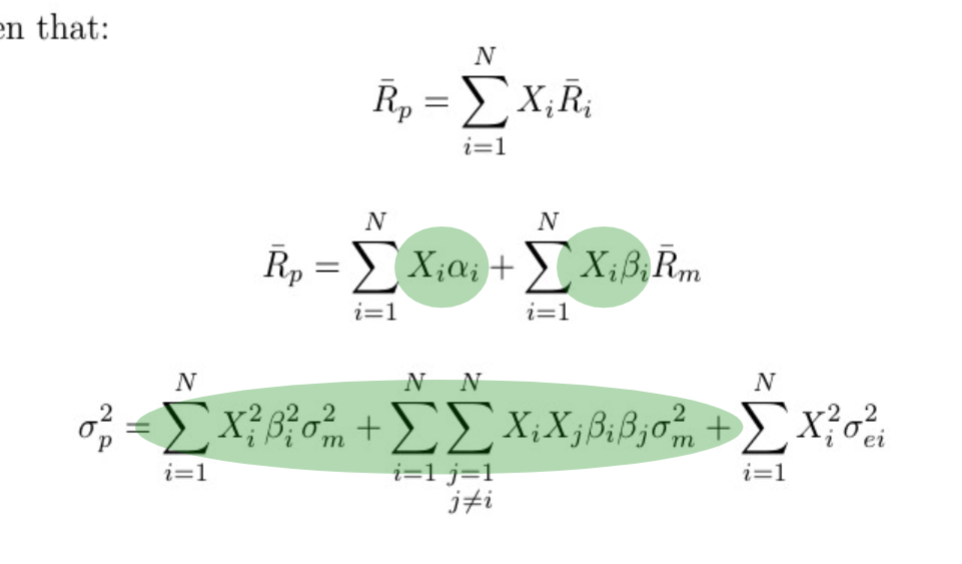

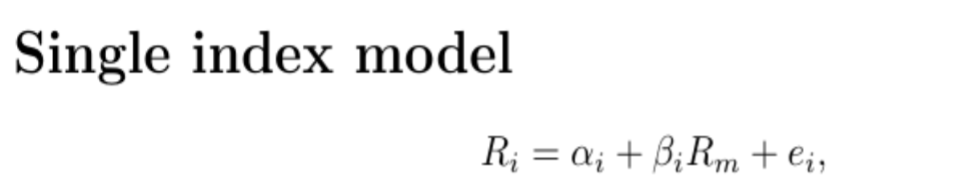

# Import data

In [2]:
indexes = yf.download("TSLA KO V SHEL", start="2011-02-01", end="2022-02-01")

[*********************100%***********************]  4 of 4 completed


In [3]:
returns = indexes['Adj Close'].resample('y').ffill().pct_change()
returns

,KO,SHEL,TSLA,V
Date,,,,
2011-12-31,NaN,NaN,NaN,NaN
2012-12-31,0.065276,-0.009086,0.185924,0.504669
2013-12-31,0.172330,0.090379,3.441394,0.480564
2014-12-31,0.052661,-0.012650,0.478495,0.186359
2015-12-31,0.051398,-0.271207,0.079133,0.191374
2016-12-31,-0.003571,0.282595,-0.109662,0.013712
2017-12-31,0.143821,0.310230,0.457017,0.471765
2018-12-31,0.067735,-0.075132,0.068894,0.164876
2019-12-31,0.205995,0.077085,0.257001,0.433270


In [4]:
returns = returns[1:]
returns

,KO,SHEL,TSLA,V
Date,,,,
2012-12-31,0.065276,-0.009086,0.185924,0.504669
2013-12-31,0.172330,0.090379,3.441394,0.480564
2014-12-31,0.052661,-0.012650,0.478495,0.186359
2015-12-31,0.051398,-0.271207,0.079133,0.191374
2016-12-31,-0.003571,0.282595,-0.109662,0.013712
2017-12-31,0.143821,0.310230,0.457017,0.471765
2018-12-31,0.067735,-0.075132,0.068894,0.164876
2019-12-31,0.205995,0.077085,0.257001,0.433270
2020-12-31,0.024691,-0.374393,7.434370,0.171242


In [5]:
cov_matrix = returns.cov()

In [6]:
returns.mean()

KO      0.084042
SHEL    0.044219
TSLA    1.152410
V       0.241667
dtype: float64

In [7]:
len(returns.mean())

4

# Single index model

In [8]:
market = yf.download("^GSPC", start="2011-02-01", end="2022-02-01")

[*********************100%***********************]  1 of 1 completed


In [9]:
mreturns = market['Adj Close'].resample('y').ffill().pct_change()
mreturns

Date
2011-12-31         NaN
2012-12-31    0.134057
2013-12-31    0.296012
2014-12-31    0.113906
2015-12-31   -0.007266
2016-12-31    0.095350
2017-12-31    0.194200
2018-12-31   -0.062373
2019-12-31    0.288781
2020-12-31    0.162589
2021-12-31    0.268927
2022-12-31   -0.052585
Freq: A-DEC, Name: Adj Close, dtype: float64

In [10]:
mreturns = mreturns[1:]
mreturns

Date
2012-12-31    0.134057
2013-12-31    0.296012
2014-12-31    0.113906
2015-12-31   -0.007266
2016-12-31    0.095350
2017-12-31    0.194200
2018-12-31   -0.062373
2019-12-31    0.288781
2020-12-31    0.162589
2021-12-31    0.268927
2022-12-31   -0.052585
Freq: A-DEC, Name: Adj Close, dtype: float64

In [11]:
mreturns = mreturns.to_numpy()

In [12]:
mreturns = mreturns.reshape(-1,1)
mreturns

array([[ 0.13405691],
       [ 0.2960125 ],
       [ 0.11390634],
       [-0.007266  ],
       [ 0.09535023],
       [ 0.19419966],
       [-0.0623726 ],
       [ 0.2887807 ],
       [ 0.16258923],
       [ 0.26892739],
       [-0.05258517]])

In [13]:
returns = returns.to_numpy()

In [14]:
returns[:,3]

array([ 0.50466866,  0.48056399,  0.1863585 ,  0.19137359,  0.01371192,
        0.47176502,  0.16487586,  0.43327013,  0.17124209, -0.00314911,
        0.04365265])

In [15]:
returns.shape[1]

4

In [16]:
reg = LinearRegression()

In [17]:
def alpha_beta_calc(returns,RM):
    alphas = []
    betas = []
    reg = LinearRegression()
    for i in range(returns.shape[1]):
        reg.fit(RM,returns[:,i].reshape(-1,1))
        betas.append(reg.coef_[0][0])
        alphas.append(reg.intercept_[0])
    return alphas,betas

In [18]:
alphas, betas = alpha_beta_calc(returns,mreturns)
alphas

[0.03682196007927107,
 -0.019938839130704128,
 0.4203703665787405,
 0.15157891700611675]

In [19]:
betas

[0.362824566254991, 0.4929687500556501, 5.624785525992833, 0.6922085681703013]

# Ranking the stocks

In [20]:
returns.mean(0)

array([0.0840419 , 0.04421877, 1.15241022, 0.24166666])

In [21]:
rf = 0.01

In [22]:
(returns.mean(0)-rf)/betas

array([0.2040708 , 0.06941366, 0.20310289, 0.33467755])

<p> $Total variance = systematic variance + unsystematic variance$<p>
<p>$Systematic risk = Beta * std_market$<p> 

In [23]:
Systematic_var = (betas[0]*mreturns.std())**2

In [24]:
returns.var(0)[0]

0.003987842229633019

In [25]:
UnsystematicRisk = np.sqrt(returns.var(0)[0]-Systematic_var)
UnsystematicRisk

0.044478004600004194

In [26]:
returns.shape[1]

4

In [27]:
betas[3]

0.6922085681703013

In [28]:
mreturns.var()

0.015265298589395878

In [29]:
def cutoff(returns,RM,Betas,rf):
    cutoffs = []
    unsystematic_var = []
    sum1 = 0
    sum2 = 0
    for j in range(returns.shape[1]):
        systematic_var = betas[j]**2*RM.var()
        unsys_var = returns.var(0)[j]-systematic_var
        
        unsystematic_var.append(unsys_var)
        
        sum1 += (returns.mean(0)[j]-rf)*betas[j]/unsys_var
        
        sum2 += betas[j]**2/unsys_var
        
        cutoff = (RM.var()*sum1)/(1+RM.var()*sum2)
        cutoffs.append(cutoff)
    
    return cutoffs,unsystematic_var

In [30]:
cutoffs, unsystematic_var = cutoff(returns,mreturns,betas,rf)
cutoffs

[0.10283514913244643,
 0.10143301105383203,
 0.1065124663654569,
 0.13094058755742025]

In [31]:
systematic_var = betas[0]*mreturns.std()
unsys_var = returns.var(0)[0]-systematic_var
unsys_var

-0.04084015500909074

In [32]:
returns.var(0)[0]-(betas[0]**2*mreturns.var())

0.0019782928931979947

In [33]:
returns.mean(0)

array([0.0840419 , 0.04421877, 1.15241022, 0.24166666])

In [34]:
def weightcalc(betas,unsystematic_var,returns,rf,cutoffs):
    zi = []
    for i in range(returns.shape[1]):
        z = (betas[i]/unsystematic_var[i])*(((returns.mean(0)[i]-rf)/betas[i])-cutoffs[3])
        zi.append(z)
    weights = []
    for i in range(returns.shape[1]):
        xi = zi[i]/np.sum(zi)
        weights.append(xi)
    return weights

In [35]:
weights = weightcalc(betas,unsystematic_var,returns,rf,cutoffs)
weights

[0.7491423465380401,
 -0.040311371559865555,
 0.005194027304441061,
 0.2859749977173844]

In [36]:
weights = np.array(weights)
weights

array([ 0.74914235, -0.04031137,  0.00519403,  0.285975  ])

In [37]:
returns

array([[ 6.52759980e-02, -9.08607540e-03,  1.85924288e-01,
         5.04668662e-01],
       [ 1.72330004e-01,  9.03785517e-02,  3.44139411e+00,
         4.80563993e-01],
       [ 5.26611672e-02, -1.26495479e-02,  4.78494877e-01,
         1.86358501e-01],
       [ 5.13978725e-02, -2.71206988e-01,  7.91331850e-02,
         1.91373594e-01],
       [-3.57084451e-03,  2.82595366e-01, -1.09662130e-01,
         1.37119174e-02],
       [ 1.43821294e-01,  3.10229675e-01,  4.57017111e-01,
         4.71765017e-01],
       [ 6.77345910e-02, -7.51324388e-02,  6.88935445e-02,
         1.64875863e-01],
       [ 2.05994529e-01,  7.70846685e-02,  2.57001189e-01,
         4.33270135e-01],
       [ 2.46913580e-02, -3.74392516e-01,  7.43436995e+00,
         1.71242089e-01],
       [ 1.13724757e-01,  2.84253949e-01,  4.97555592e-01,
        -3.14910750e-03],
       [ 3.04001875e-02,  1.84331785e-01, -1.13609318e-01,
         4.36526452e-02]])

# Test

In [39]:
V = np.sqrt(weights.T @ cov_matrix @ weights)
print(V)

0.097203408947258


In [44]:
R = np.sum(returns.mean(0) * weights)
R

0.13627310191414982

In [45]:
len(weights)

4

In [48]:
mreturns.mean()

0.1301453803150532

In [49]:
def test(weights,alphas,betas,RM):
    Rp = 0
    sum1 = 0
    sum2 = 0
    for i in range(len(weights)):
        sum1 += weights[i]*alphas[i]
        sum2 += weights[i]*betas[i]
    Rp = sum1+sum2*RM.mean()
    return Rp

In [50]:
test(weights,alphas,betas,mreturns)

0.13627310191414982

# Import ESG data

In [57]:
ESG_data = pd.read_csv("ESG_DATA.csv") 

In [62]:
ESG_data

,Isin,CurrencyCode,company_name,environment_grade,environment_level,environment_score,governance_grade,governance_level,governance_score,social_grade,social_level,social_score,stock_symbol,total,total_grade,total_level
0,SE0011337708,SEK,AAK AB (publ.),AA,Excellent,647,BB,Medium,345,BB,Medium,307,AAK,1299,A,High
1,CH0012221716,SEK,ABB Ltd,BB,Medium,306,B,Medium,220,BBB,High,425,ABB,951,BBB,High
2,SE0007897079,SEK,ACADIA Pharmaceuticals Inc.,B,Medium,290,BB,Medium,300,BB,Medium,344,ACAD,934,BBB,High
3,SE0014781795,SEK,Addtech AB (publ.),A,High,500,BB,Medium,300,BB,Medium,300,ADDT-B,1100,BBB,High
4,CA00830W1059,SEK,AEC Securities Public Company Limited,B,Medium,240,BB,Medium,300,BB,Medium,300,AEC,840,BB,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,DK0060036564,DKK,Spar Nord Bank A/S,B,Medium,230,BB,Medium,300,B,Medium,216,SPNO,746,B,Medium
283,DK0060696300,DKK,Straker Translations Limited,BBB,High,410,BB,Medium,315,BB,Medium,301,STG,1026,BBB,High
284,DK0010311471,DKK,Sydbank A/S,A,High,500,BB,Medium,300,BB,Medium,301,SYDB,1101,BBB,High
285,DK0060477503,DKK,Thorney Opportunities Ltd,B,Medium,215,BB,Medium,305,B,Medium,203,TOP,723,B,Medium


In [79]:
lol = ESG_data[ESG_data['environment_level']=='High']
lol

,Isin,CurrencyCode,company_name,environment_grade,environment_level,environment_score,governance_grade,governance_level,governance_score,social_grade,social_level,social_score,stock_symbol,total,total_grade,total_level
3,SE0014781795,SEK,Addtech AB (publ.),A,High,500,BB,Medium,300,BB,Medium,300,ADDT-B,1100,BBB,High
5,SE0000695876,SEK,Alfa Financial Software Holdings PLC,A,High,540,BB,Medium,340,BB,Medium,300,ALFA,1180,BBB,High
9,SE0010468116,SEK,Arjo AB (publ),A,High,530,BB,Medium,315,BB,Medium,345,ARJO-B,1190,BBB,High
10,SE0003883990,SEK,"Archrock, Inc.",BBB,High,423,BB,Medium,310,BB,Medium,303,AROC,1036,BBB,High
14,SE0007666110,SEK,Attendo AB (publ),A,High,500,BB,Medium,305,BB,Medium,300,ATT,1105,BBB,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,DK0060854669,DKK,Ringkjøbing Landbobank A/S,A,High,500,BB,Medium,300,B,Medium,206,RILBA,1006,BBB,High
275,DK0010219070,DKK,ROCKWOOL International A/S,A,High,555,BB,Medium,300,BB,Medium,305,ROCK-A,1160,BBB,High
276,DK0010267129,DKK,Raytheon Technologies Corporation,A,High,565,BB,Medium,320,BB,Medium,320,RTX,1205,A,High
283,DK0060696300,DKK,Straker Translations Limited,BBB,High,410,BB,Medium,315,BB,Medium,301,STG,1026,BBB,High


In [82]:
symboler = lol['stock_symbol'].to_numpy()
symboler

array(['ADDT-B', 'ALFA', 'ARJO-B', 'AROC', 'ATT', 'AZN', 'BILL', 'BRILL',
       'CS', 'CTT', 'DOM', 'EG7', 'EPRO-B', 'EQT', 'ESSITY-A', 'FABG',
       'FIL', 'FNM', 'GENI', 'HOLM-A', 'HPOL-B', 'HUM', 'IMPC', 'INDT',
       'INDU-A', 'INT', 'INTRUM', 'KAR', 'KIND-SDB', 'LATO-B', 'LOOMIS',
       'LUMI', 'LUND-B', 'M8G', 'MTG-A', 'MYCR', 'NCC-A', 'NIBE-B', 'NIO',
       'NOBI', 'NOLA-B', 'PAX', 'PEAB-B', 'PFE', 'PREC', 'PURE', 'RATO-A',
       'SAGA-A', 'SEB-A', 'SECU-B', 'SEYE', 'SFL', 'SOBI', 'SWEC-A',
       'TEL2-A', 'TREL-B', 'UTG', 'VITR', 'VOLV-A', 'ABT', 'AFK', 'AKVA',
       'AMSC', 'ARR', 'B2H', 'BAKKA', 'BGBIO', 'BWE', 'BWEK', 'BWO',
       'DOF', 'ELK', 'ELO', 'EMGS', 'EPR', 'FLNG', 'FRO', 'GEOS', 'GIG',
       'GOD', 'GOGL', 'GSF', 'HAVI', 'HBC', 'IOX', 'KCC', 'KIT', 'KOA',
       'LUMI', 'MGN', 'MPCC', 'MSEIS', 'MULTI', 'NAPA', 'NAVA', 'NEL',
       'NKR', 'NOM', 'NRC', 'NSKOG', 'ODF', 'ODL', 'OET', 'OKEA', 'OTS',
       'PEXIP', 'PHO', 'PLT', 'QFR', 'REACH', 'RISH', 'SBO'

In [83]:
symboler[0]

'ADDT-B'

In [87]:
test_string = ""
for i in range(10):
    test_string = test_string + symboler[i] + " "

In [88]:
test_string

'ADDT-B ALFA ARJO-B AROC ATT AZN BILL BRILL CS CTT '

In [71]:
ESG_data['stock_symbol']

0         AAK
1         ABB
2        ACAD
3      ADDT-B
4         AEC
        ...  
282      SPNO
283       STG
284      SYDB
285       TOP
286      TRYG
Name: stock_symbol, Length: 287, dtype: object